In [1]:
!pip install mysql-connector-python

In [2]:
!pip install matplotlib

  Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.0 MB 4.8 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/8.0 MB 4.7 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/8.0 MB 4.7 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/8.0 MB 4.7 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.0 MB 4.7 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.0 MB 4.6 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.0 MB 4.6 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.0 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 4.6 MB/s eta 0:00:00
Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl 

In [5]:
!pip install seaborn

In [7]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the database
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",  
    database="chicago_crime_details",
    port=3307  )
my_cursor = mydb.cursor()

# Helper function to fetch data into a DataFrame
def fetch_data(query):
    return pd.read_sql(query, mydb)

C:\Users\rohit\AppData\Local\Temp\ipykernel_21764\2561435550.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, mydb)
C:\Users\rohit\AppData\Local\Temp\ipykernel_21764\404510095.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


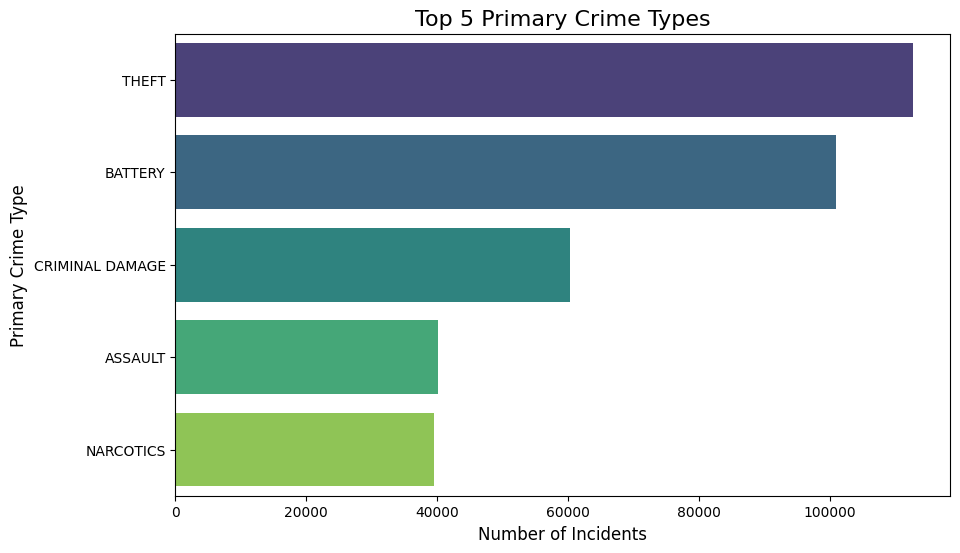

In [21]:
# Fetch data
q1 = """
SELECT Primary_Type, COUNT(*) AS Total_Crimes
FROM crime_details
GROUP BY Primary_Type
ORDER BY Total_Crimes DESC
LIMIT 5;
"""
df_top_crime_types = fetch_data(q1)

# Plot
plt.figure(figsize=(10, 6))

# sns.barplot requires properly ordered data for y-axis
sns.barplot(
    data=df_top_crime_types,
    x="Total_Crimes",
    y="Primary_Type",
    palette="viridis",
)

plt.title("Top 5 Primary Crime Types", fontsize=16)
plt.xlabel("Number of Incidents", fontsize=12)
plt.ylabel("Primary Crime Type", fontsize=12)
plt.show()


C:\Users\rohit\AppData\Local\Temp\ipykernel_21764\2561435550.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, mydb)


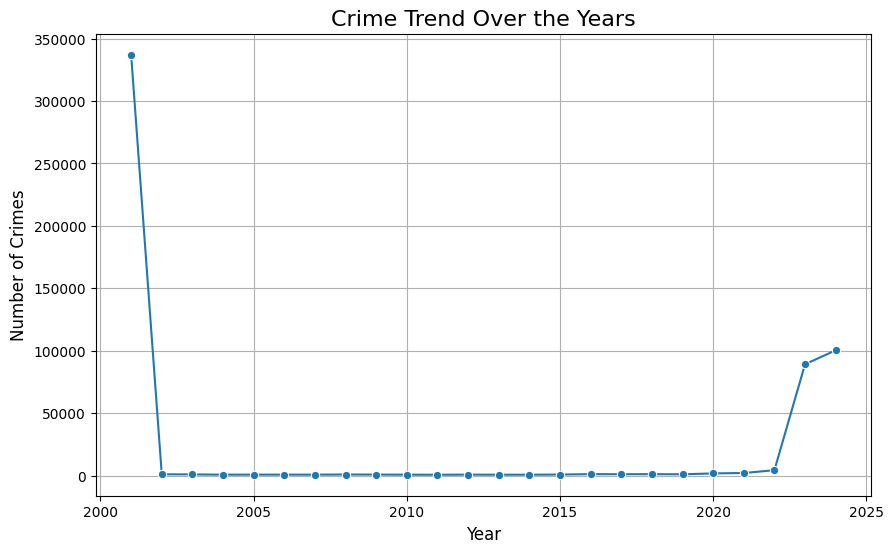

In [11]:
# 2. Crime Trend Over the Years
q2 = """
SELECT YEAR(Case_Date) AS Year, COUNT(*) AS Total_Crimes
FROM crime_details
GROUP BY Year
ORDER BY Year;
"""
df_crime_trend = fetch_data(q2)

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_crime_trend['Year'], y=df_crime_trend['Total_Crimes'], marker='o')
plt.title('Crime Trend Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.grid(True)
plt.show()

C:\Users\rohit\AppData\Local\Temp\ipykernel_21764\2561435550.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, mydb)
C:\Users\rohit\AppData\Local\Temp\ipykernel_21764\2593094973.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_top_locations['Total_Crimes'], y=df_top_locations['Location_Description'], palette='coolwarm')


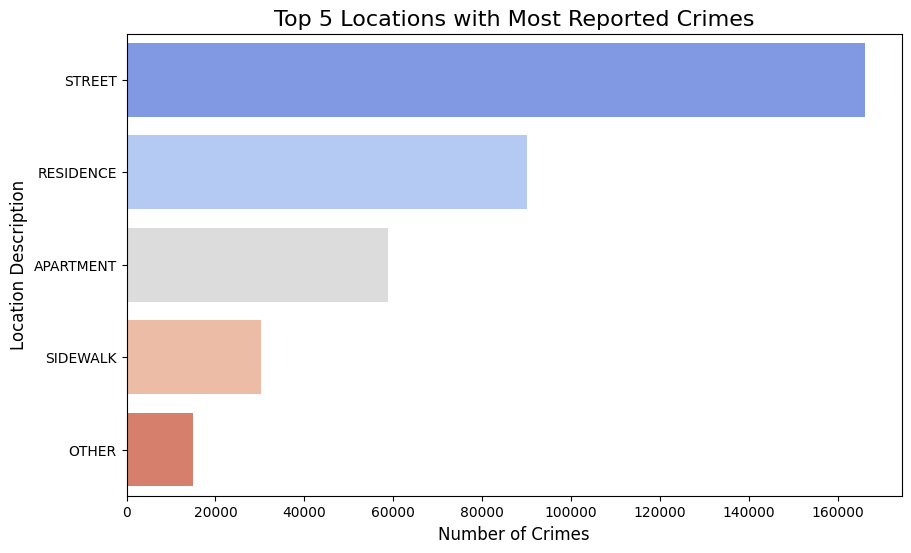

In [12]:
# 3. Crimes by Location Description
q3 = """
SELECT Location_Description, COUNT(*) AS Total_Crimes
FROM crime_details
GROUP BY Location_Description
ORDER BY Total_Crimes DESC
LIMIT 5;
"""
df_top_locations = fetch_data(q3)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=df_top_locations['Total_Crimes'], y=df_top_locations['Location_Description'], palette='coolwarm')
plt.title('Top 5 Locations with Most Reported Crimes', fontsize=16)
plt.xlabel('Number of Crimes', fontsize=12)
plt.ylabel('Location Description', fontsize=12)
plt.show()

C:\Users\rohit\AppData\Local\Temp\ipykernel_21764\2561435550.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, mydb)


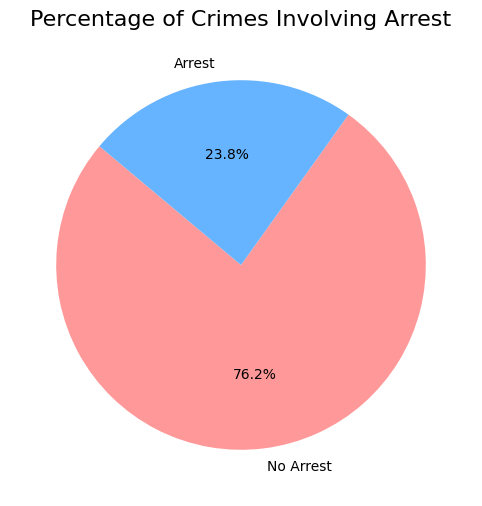

In [13]:
# 4. Crimes Involving Arrest
q4 = """
SELECT Arrest, COUNT(*) AS Total_Crimes
FROM crime_details
GROUP BY Arrest;
"""
df_arrests = fetch_data(q4)

# Plot
plt.figure(figsize=(8, 6))
arrest_labels = ['No Arrest', 'Arrest']
plt.pie(df_arrests['Total_Crimes'], labels=arrest_labels, autopct='%1.1f%%', startangle=140, colors=['#FF9999', '#66B3FF'])
plt.title('Percentage of Crimes Involving Arrest', fontsize=16)
plt.show()

C:\Users\rohit\AppData\Local\Temp\ipykernel_21764\2561435550.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, mydb)


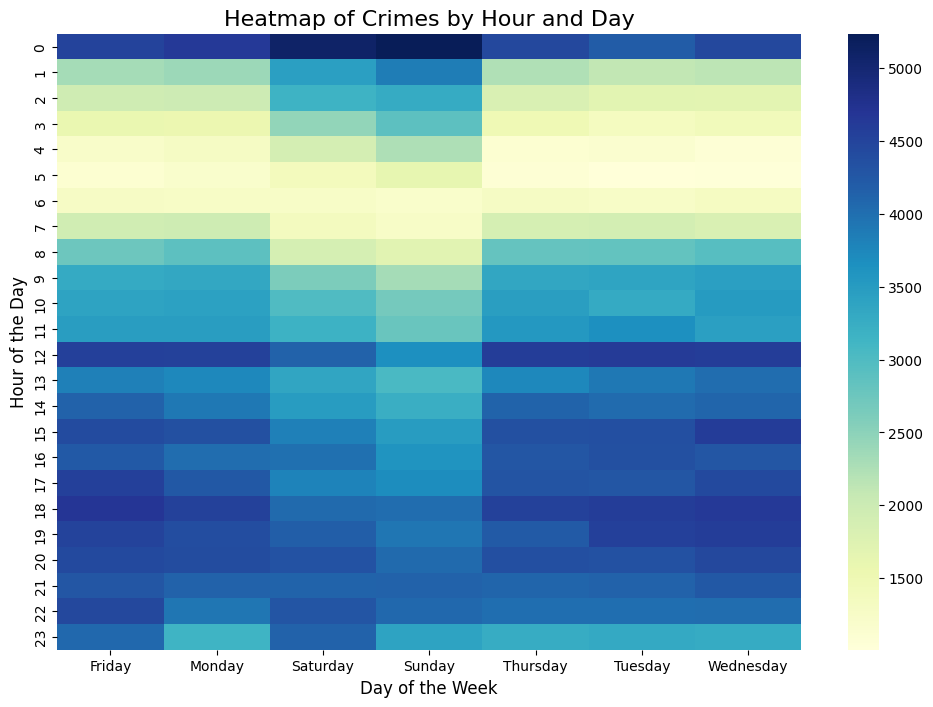

In [16]:
# Fetch data
q5 = """
SELECT 
    HOUR(Case_Time) AS Hour,
    DAYNAME(Case_Date) AS Day,
    COUNT(*) AS Total_Crimes
FROM crime_details
GROUP BY Hour, Day
ORDER BY Hour, Day;
"""
df_crime_heatmap = fetch_data(q5)

# Pivot table for heatmap
heatmap_data = df_crime_heatmap.pivot(index="Hour", columns="Day", values="Total_Crimes")

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False, cbar=True)
plt.title('Heatmap of Crimes by Hour and Day', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Hour of the Day', fontsize=12)
plt.show()

